In [ ]:
!pip3 install ipython-autotime
!pip3 install umap-learn
%load_ext autotime


import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm.notebook import tqdm
tqdm.pandas()
import requests

from termcolor import colored
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

nb_workers=10
my_dir='/YOUR-DIR/'

import os
from datetime import datetime
import pickle
import ast
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=6d965fcac375d37e640a85c54ae49898366ba24c79210ac37336c50604d512b1
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=567b10bf220724c63add35e14d7f0e6b3d51774eefc8d1d6f1c310c26d4935dd
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
time: 1.69 s (started: 2023-11-06 11:49:24 +00:00)


In [ ]:
# Choose the dataset from here:


# user_list_df = pd.read_hdf(f'{my_dir}/Datasets/congresspeople_list.hdf')
# user_list_df = pd.read_hdf(f'{my_dir}/Datasets/User_lists/hashtag_users_list.hdf')
# user_list_df = pd.read_hdf(f'{my_dir}/Datasets/User_lists/network_users_list.hdf')

time: 2.67 s (started: 2023-11-06 11:49:35 +00:00)


In [ ]:
import umap.umap_ as umap
manifold = umap.UMAP(n_components=2,
                  n_neighbors = 100,
                  metric='cosine', verbose=True,
                  random_state=2).fit(list(user_list_df_['average_embedding']))
embeddings_2D = manifold.transform(list(user_list_df_['average_embedding']))
user_list_df_=vector_to_column(df = user_list_df_, vectors=embeddings_2D, column_name='average_embedding_2D')

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=100, random_state=2, verbose=True)
Mon Nov  6 11:50:06 2023 Construct fuzzy simplicial set
Mon Nov  6 11:50:23 2023 Finding Nearest Neighbors
Mon Nov  6 11:50:28 2023 Finished Nearest Neighbor Search
Mon Nov  6 11:50:30 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Nov  6 11:50:43 2023 Finished embedding
time: 55.8 s (started: 2023-11-06 11:49:47 +00:00)


<ipython-input-2-a47de42cdd8c>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=0
<ipython-input-2-a47de42cdd8c>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name]=df[column_name].astype(object)


# 2D Projection

## for congresspeople

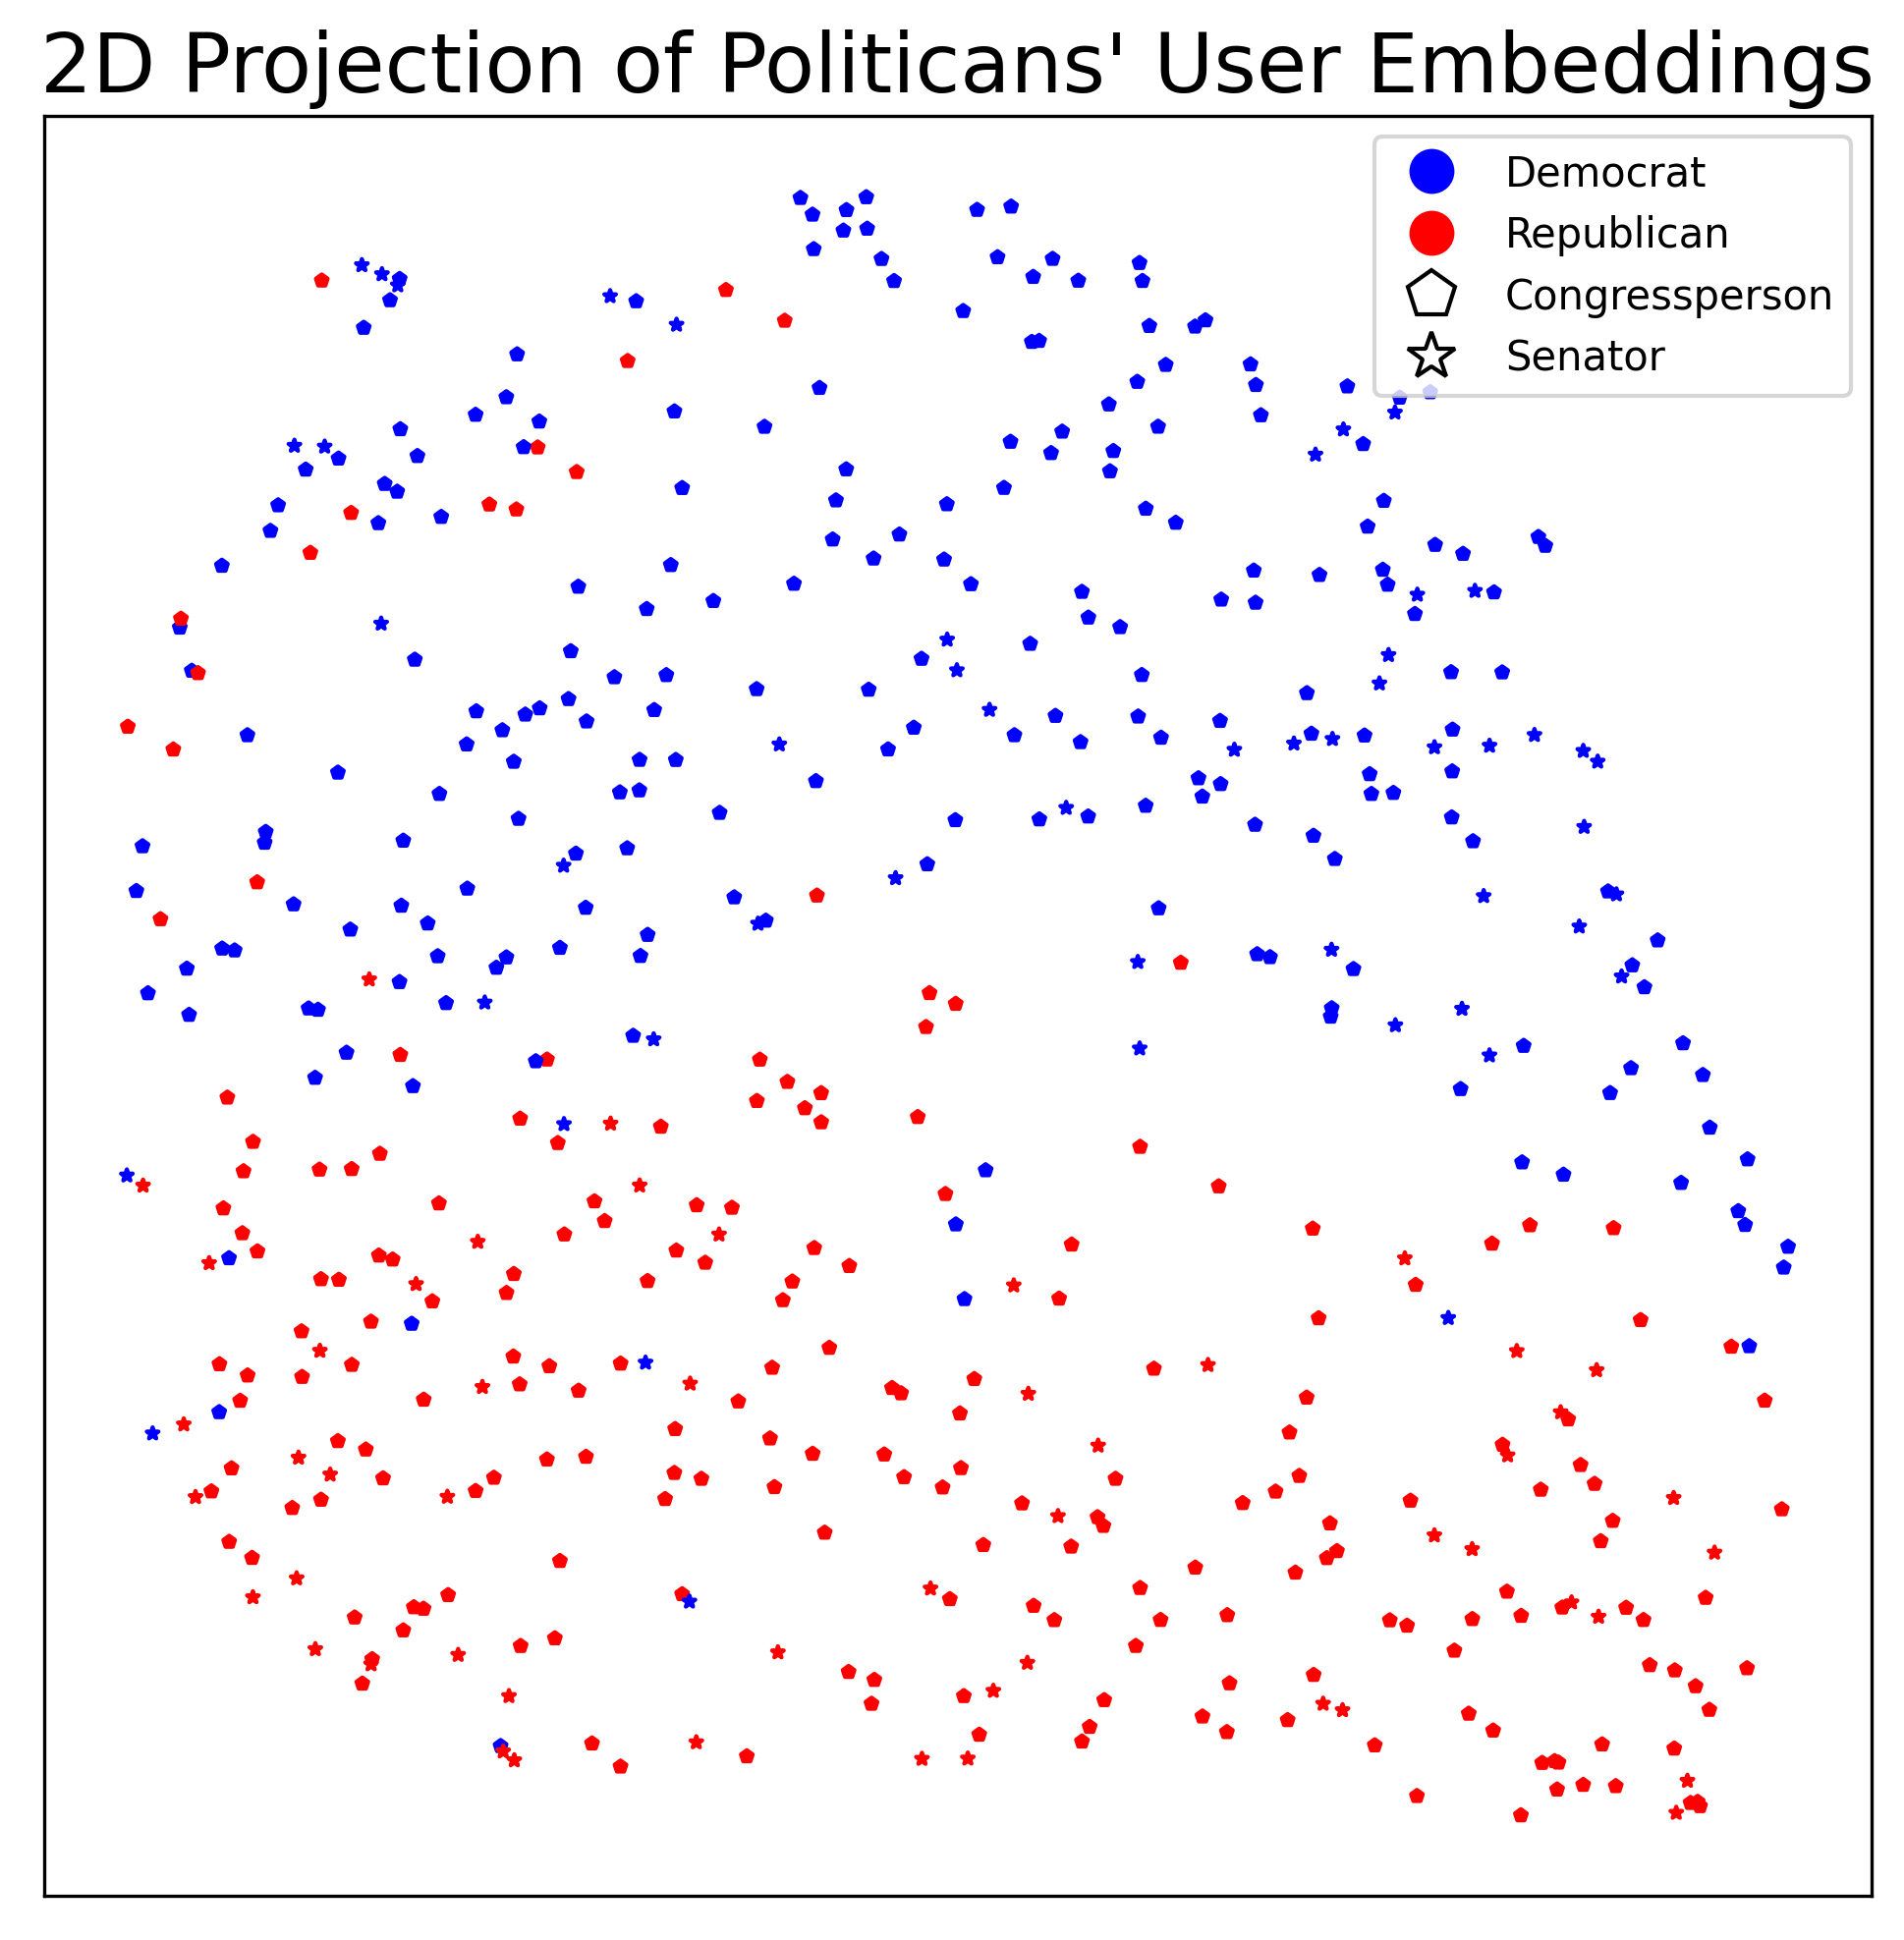

time: 2.37 s (started: 2022-07-06 12:37:03 +00:00)


In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

x_rep = [x for x, y in user_list_df_[user_list_df_['type']=='rep']['average_embedding_2D']]
y_rep = [y for x, y in user_list_df_[user_list_df_['type']=='rep']['average_embedding_2D']]
x_sen = [x for x, y in user_list_df_[user_list_df_['type']=='sen']['average_embedding_2D']]
y_sen = [y for x, y in user_list_df_[user_list_df_['type']=='sen']['average_embedding_2D']]

graph_colors_dict = {'D':'blue','R':'red'}
graph_markers_dict = {'rep':"p",'sen':"*"}

# sns.set_theme(font_scale=1.5, style = "white")
plt.figure(figsize = (8,8),dpi=300) # Here's the part I need
# plt.xlim(-5,15)
# plt.ylim(-10, 15)
plt.scatter(x_rep, y_rep, s=9, c = user_list_df_[user_list_df_['type']=='rep']["party"].map(graph_colors_dict),marker=graph_markers_dict.get('rep'))
plt.scatter(x_sen, y_sen, s=9, c = user_list_df_[user_list_df_['type']=='sen']["party"].map(graph_colors_dict),marker=graph_markers_dict.get('sen'))
plt.title('2D Projection of Politicans\' User Embeddings',size=20)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
pop_d = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('D'), color='w', label="Democrat", marker="o", markersize=12)
pop_r = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('R'), color='w', label="Republican", marker="o", markersize=12)
pop_c = Line2D([0], [0],markerfacecolor='white', markeredgecolor='black', color='w', label="Congressperson", marker=graph_markers_dict.get('rep'), markersize=12)
pop_s = Line2D([0], [0],markerfacecolor='white', markeredgecolor='black', color='w', label="Senator", marker=graph_markers_dict.get('sen'), markersize=12)
# pop_58 = mpatches.Patch(color=graph_colors_dict.get(58), label='Forum 58')
plt.legend(handles=[pop_d,pop_r,pop_c,pop_s], loc="upper right")
plt.savefig(my_dir+"Charts/Dem_Rep_complete_2D"+".png", bbox_inches = 'tight',format="png", dpi=550)

## for Hashtag Users

In [ ]:
graph_colors_dict = {'StandWithUkraine':'yellow','Pro-Gun':'red','Anti-Gun':'blue','Pro-Abortion':'deepskyblue','Anti-Abortion':'deeppink'}

time: 876 µs (started: 2022-07-08 14:32:11 +00:00)


In [ ]:
user_list_df_['hashtag'].value_counts()

Anti-Abortion       700
Anti-Gun            700
Pro-Abortion        700
Pro-Gun             700
StandWithUkraine    700
Name: hashtag, dtype: int64

time: 7.98 ms (started: 2022-07-08 13:03:13 +00:00)


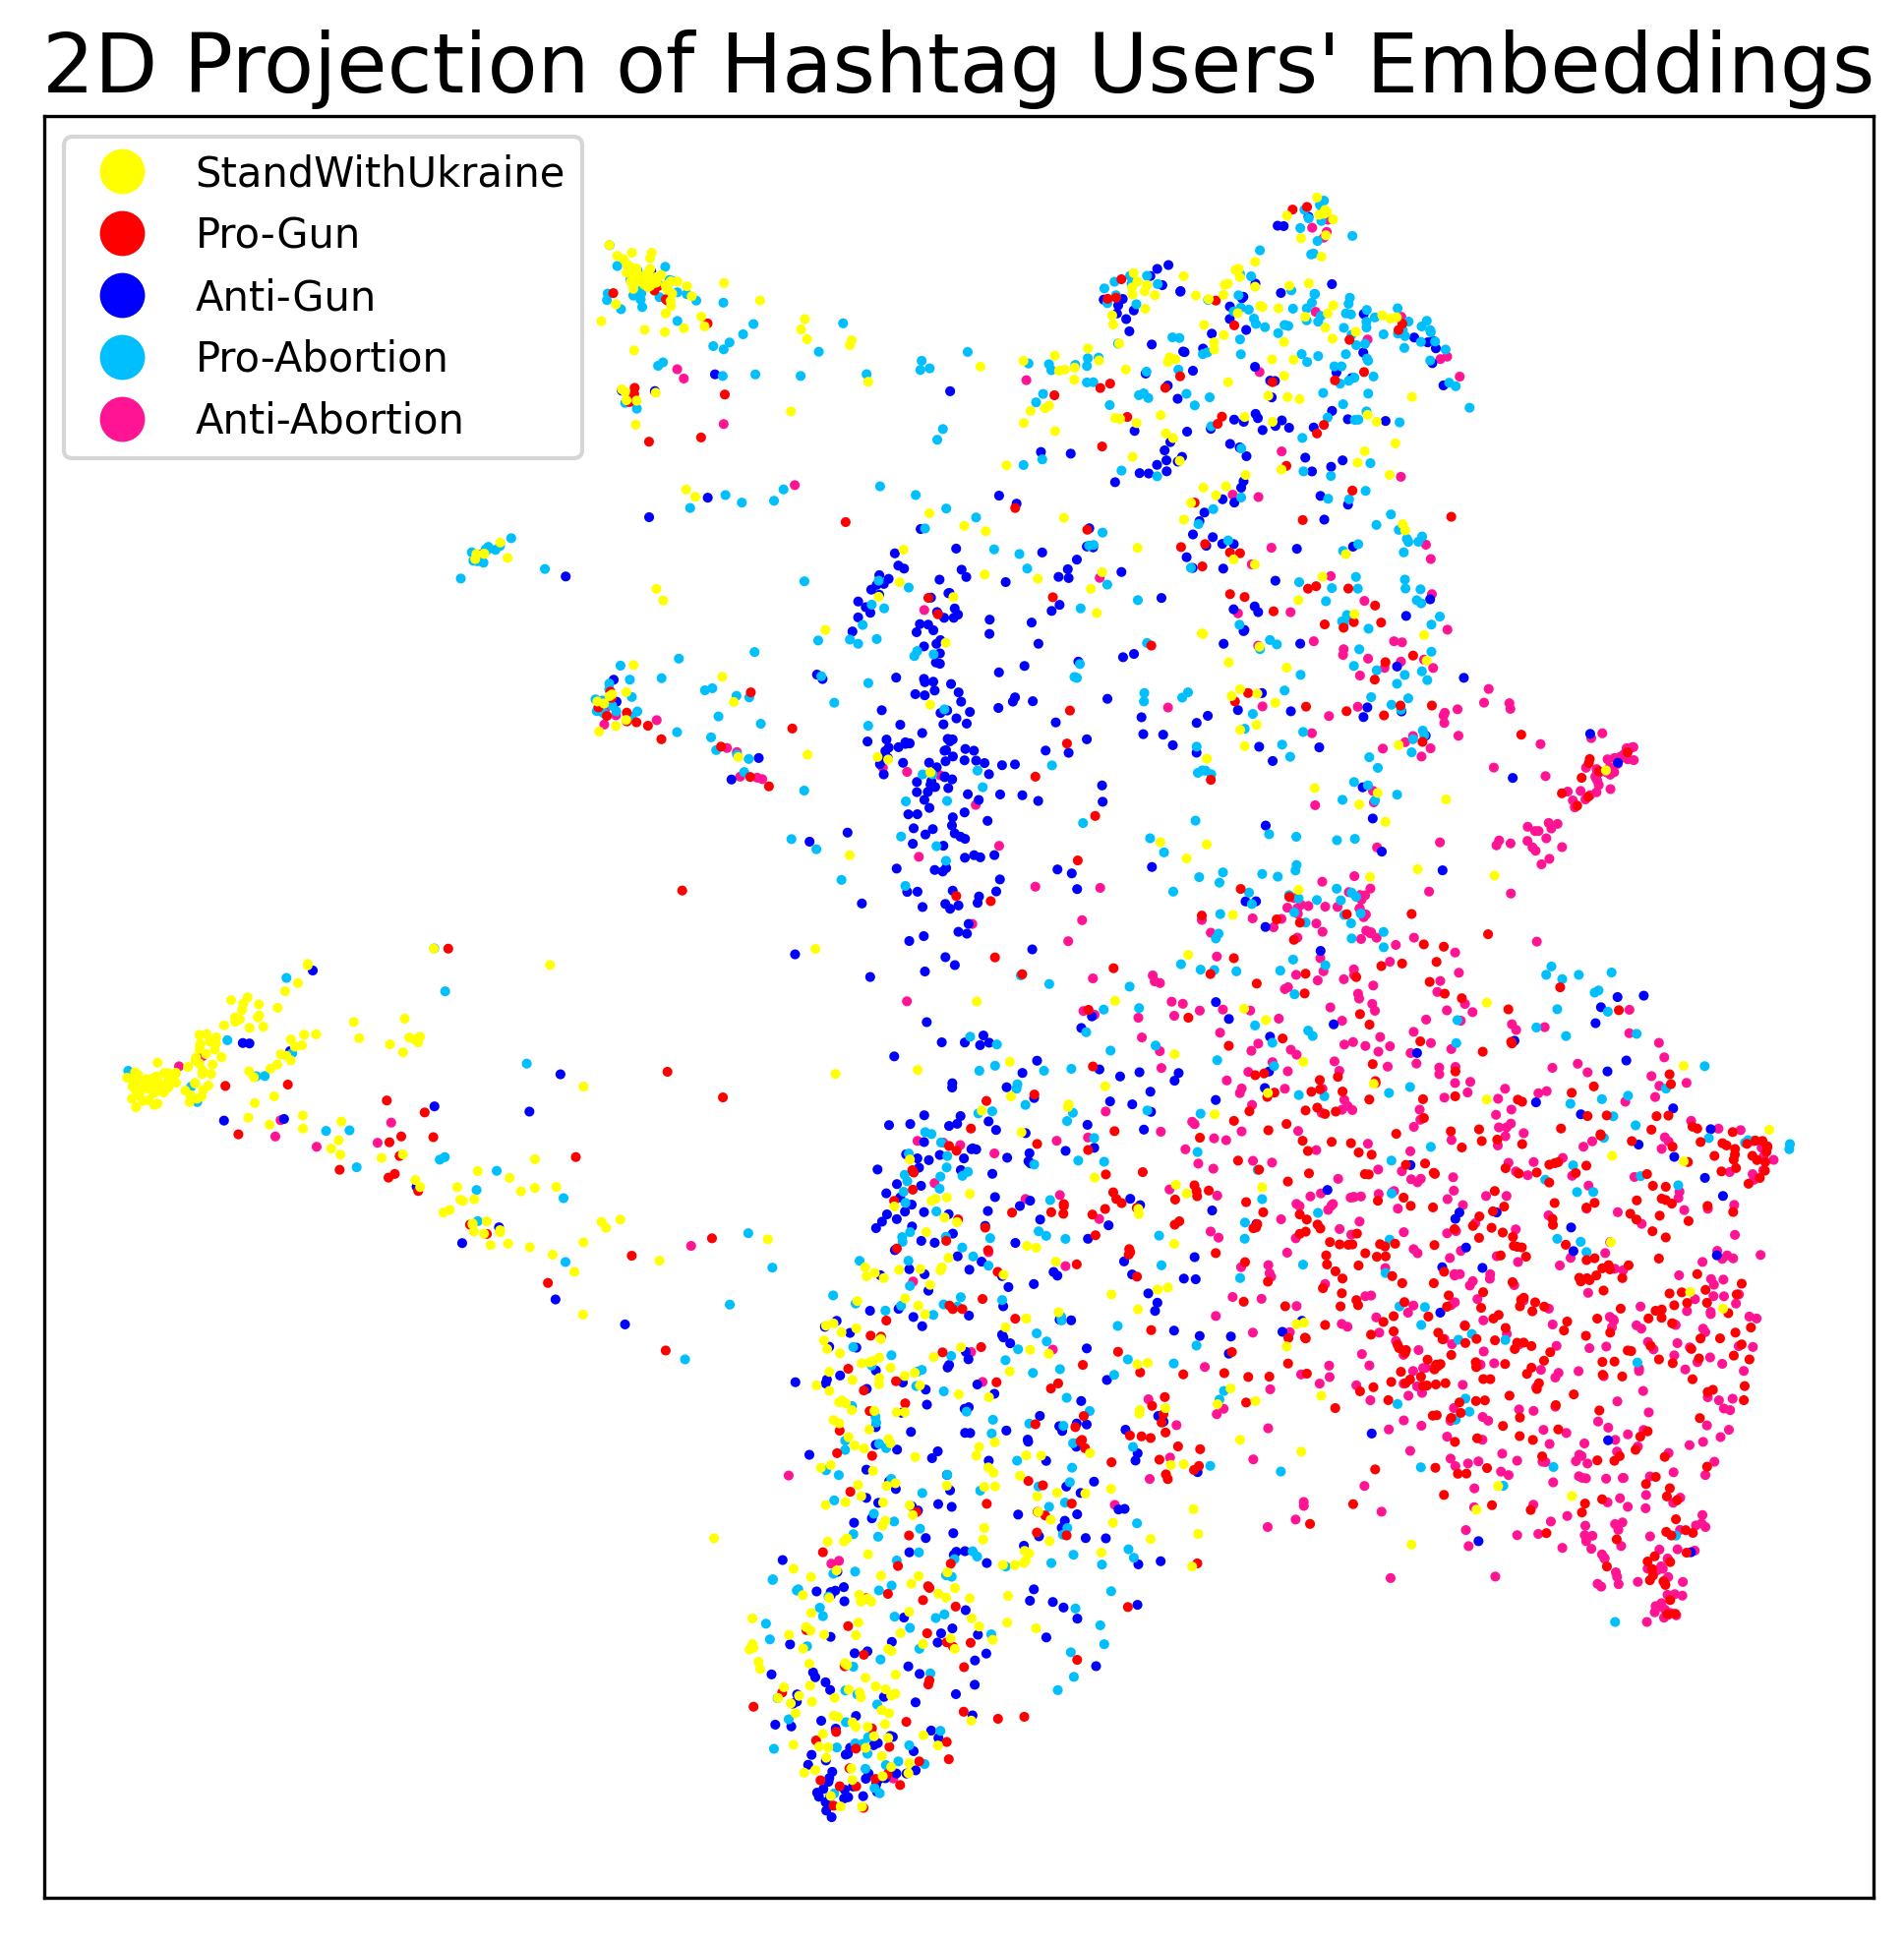

time: 2.78 s (started: 2022-07-07 13:43:26 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

x = [x for x, y in user_list_df_['average_embedding_2D']]
y = [y for x, y in user_list_df_['average_embedding_2D']]



# sns.set_theme(font_scale=1.5, style = "white")
plt.figure(figsize = (8,8),dpi=300) # Here's the part I need
# plt.xlim(-5,15)
# plt.ylim(-10, 15)
plt.scatter(x, y, s=2, c = user_list_df_["hashtag"].map(graph_colors_dict))
plt.title('2D Projection of Hashtag Users\' Embeddings',size=20)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
pop_a = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('StandWithUkraine'), color='w', label="StandWithUkraine", marker="o", markersize=12)
pop_b = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('Pro-Gun'), color='w', label="Pro-Gun", marker="o", markersize=12)
pop_c = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('Anti-Gun'), color='w', label="Anti-Gun", marker="o", markersize=12)
pop_d = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('Pro-Abortion'), color='w', label="Pro-Abortion", marker="o", markersize=12)
pop_e = Line2D([0], [0],markerfacecolor=graph_colors_dict.get('Anti-Abortion'), color='w', label="Anti-Abortion", marker="o", markersize=12)

# pop_58 = mpatches.Patch(color=graph_colors_dict.get(58), label='Forum 58')
plt.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e], loc="upper left")
plt.savefig(my_dir+"Charts/HashtagUsers_2D"+".png", bbox_inches = 'tight',format="png", dpi=550)

## for Network Users

In [ ]:
graph_colors_dict = {0:'blue',1:'red'}
name_dict = {0:'Chamber A',1:'Chamber B'}

graph_colors_dict = {0:'gold',1:'deepskyblue'}
name_dict = {0:'Chamber A',1:'Chamber B'}

time: 726 µs (started: 2023-11-06 12:00:59 +00:00)


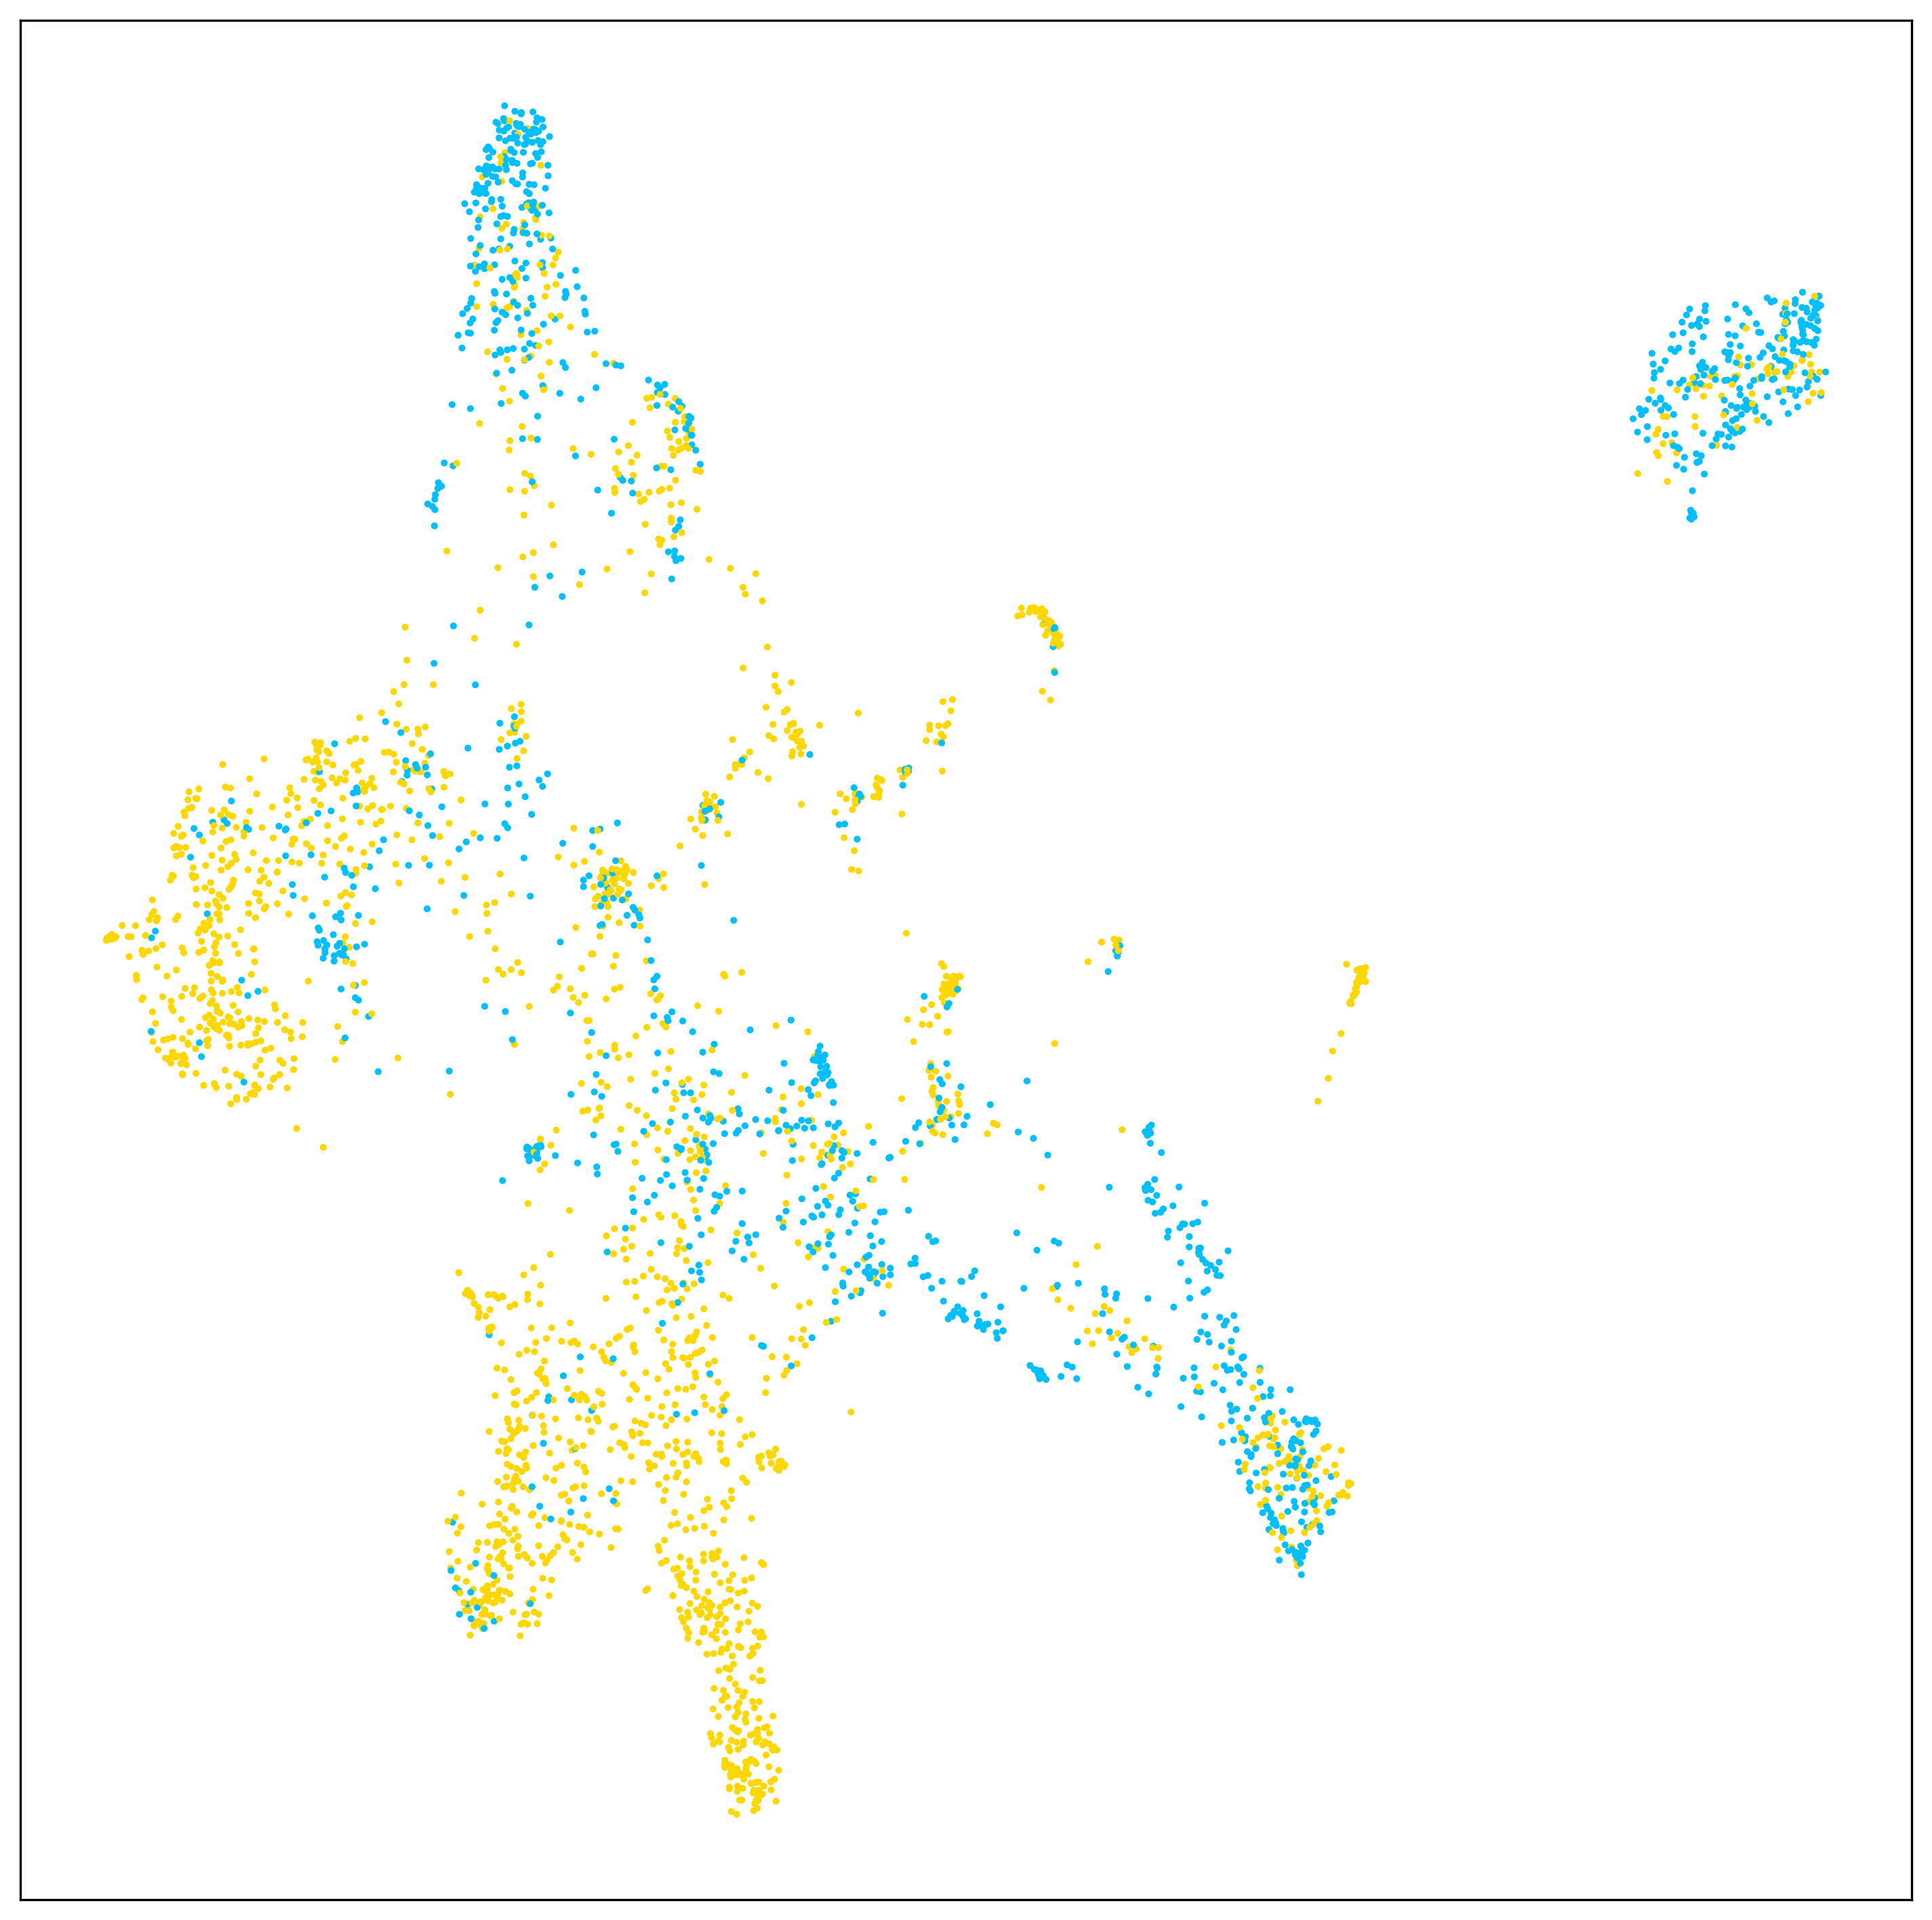

time: 2.28 s (started: 2023-11-06 12:02:08 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D

x = [x for x, y in user_list_df_['average_embedding_2D']]
y = [y for x, y in user_list_df_['average_embedding_2D']]



# sns.set_theme(font_scale=1.5, style = "white")
plt.figure(figsize = (12,12),dpi=300) # Here's the part I need
# plt.xlim(-5,15)
# plt.ylim(-10, 15)
plt.scatter(x, y, s=2, c = user_list_df_[topic].map(graph_colors_dict))
# plt.title(f'2D Projection of {topic} Users\' Embeddings',size=20)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

pop_a = Line2D([0], [0],markerfacecolor=graph_colors_dict.get(0), color='w', label=name_dict.get(0), marker="o", markersize=12)
pop_b = Line2D([0], [0],markerfacecolor=graph_colors_dict.get(1), color='w', label=name_dict.get(1), marker="o", markersize=12)

# pop_58 = mpatches.Patch(color=graph_colors_dict.get(58), label='Forum 58')
# plt.legend(handles=[pop_a,pop_b], loc="upper right")
plt.savefig(my_dir+f"Charts/{topic}_new_retweet_2D"+".png", bbox_inches = 'tight',format="png", dpi=300)

# Variance Calculation

In [ ]:
data = [[2,2],[0,0]]

print(np.std(data,axis=0).mean())

1.0
time: 4.81 ms (started: 2022-07-01 15:47:48 +00:00)


In [ ]:
data=list(user_list_df_[user_list_df_['hashtag']=='Pro-Gun']['average_embedding_2D'])
print(np.std(data))

1.7503154
time: 18.3 ms (started: 2022-07-01 14:38:29 +00:00)


In [ ]:
user_list_df = pd.read_hdf(f'{my_dir}Datasets/User_lists/hashtag_users_list.hdf')
user_list_df_ = user_list_df[user_list_df['average_embedding'].map(len)>1]

time: 3.08 s (started: 2023-11-04 17:36:37 +00:00)


In [ ]:
user_list_df_

,user_screen_name_old,hashtag,user_id,user_info,average_embedding
0,1215jorge,Pro-Gun,191707978,"{'id': 191707978, 'id_str': '191707978', 'name...","[-0.0046667918, 0.05530896, 0.0020495367, 0.00..."
1,125LolaLola,Pro-Gun,37808197,"{'id': 37808197, 'id_str': '37808197', 'name':...","[-0.01883486, 0.07484672, 0.0042844554, 0.0088..."
2,1Egetfl,Pro-Gun,833080577582624768,"{'id': 833080577582624768, 'id_str': '83308057...","[-0.009108344, 0.063201874, 0.0027614383, 0.00..."
3,45LVNancy,Pro-Gun,1477071867219304449,"{'id': 1477071867219304449, 'id_str': '1477071...","[-0.017589265, 0.07834912, 0.0033631946, 0.005..."
4,1libertyboi,Pro-Gun,1150064718758981632,"{'id': 1150064718758981632, 'id_str': '1150064...","[-0.014149628, 0.07611318, 0.0047517954, 0.002..."
...,...,...,...,...,...
21390,edwards_lill,StandWithUkraine,1134106780366180352,"{'id': 1134106780366180352, 'id_str': '1134106...","[-0.019277696, 0.07905936, 0.005222643, 0.0037..."
21391,MrsNDpendent,StandWithUkraine,22256226,"{'id': 22256226, 'id_str': '22256226', 'name':...","[-0.005334577, 0.07084483, 0.005182821, -0.001..."
21392,plzsirnomorety,StandWithUkraine,user not found,{},[0]
21393,sme1965,StandWithUkraine,793818497713213440,"{'id': 793818497713213440, 'id_str': '79381849...","[0.0077153877, 0.039057262, -0.010893657, 0.01..."


time: 77.9 ms (started: 2023-11-04 17:31:33 +00:00)


In [ ]:
graph_colors_dict = {'Pro-Abortion':'deepskyblue',
                     'Anti-Gun':'blue',
                     'StandWithUkraine':'yellow',
                     'Pro-Gun':'red',
                     'Anti-Abortion':'pink',
                     'SXSW':'green'}

time: 634 µs (started: 2023-11-04 17:41:44 +00:00)


In [ ]:
def get_bootstrap_confidence(df_x, column_x, confidence_x, sample_size_x):
  values = [np.var(list(df_x.sample(n=sample_size_x, random_state=i, replace=True)[column_x]),axis=0).mean() for i in range(1000)]
  return np.percentile(values,[100*(1-confidence_x)/2,100*(1-(1-confidence_x)/2)])


time: 620 µs (started: 2023-11-04 17:36:46 +00:00)


In [ ]:
CIs={}
for hashtag_x in list(set(user_list_df_['hashtag'])):
  print(f'std for {hashtag_x} is:')
  data = user_list_df_[user_list_df_['hashtag']==hashtag_x]
  print(np.var(list(user_list_df_[user_list_df_['hashtag']==hashtag_x]['average_embedding']),axis=0).mean())
  CI_x = get_bootstrap_confidence(df_x = data, column_x = 'average_embedding', confidence_x = 0.95, sample_size_x =700)
  CIs.update({hashtag_x:CI_x})
  print(CI_x)

CIs = pd.DataFrame.from_dict(CIs).T.reset_index().rename({'index':'Hashtag',0:'LL',1:'UL'},axis=1)
CIs['mean'] = (CIs['LL']+CIs['UL'])/2
CIs['color']=CIs['Hashtag'].map(graph_colors_dict)
CIs

std for StandWithUkraine is:
0.00010574405
[0.00010007 0.00011249]
std for Anti-Gun is:
8.051867e-05
[7.54968312e-05 8.48613259e-05]
std for Pro-Abortion is:
8.516477e-05
[8.09223207e-05 9.01737412e-05]
std for Pro-Gun is:
5.557951e-05
[5.15458620e-05 5.94132936e-05]
std for Anti-Abortion is:
5.251726e-05
[4.93502768e-05 5.58143253e-05]


,Hashtag,LL,UL,mean,color
0,StandWithUkraine,0.000100,0.000112,0.000106,yellow
1,Anti-Gun,0.000075,0.000085,0.000080,blue
2,Pro-Abortion,0.000081,0.000090,0.000086,deepskyblue
3,Pro-Gun,0.000052,0.000059,0.000055,red
4,Anti-Abortion,0.000049,0.000056,0.000053,pink


time: 9.64 s (started: 2023-11-04 17:41:51 +00:00)


In [ ]:
print(f'std for #sxsw is:')
# data = user_list_df_[user_list_df_['hashtag']==hashtag_x]
print(np.var(list(user_list_df_['average_embedding']),axis=0).mean())
CI_x = get_bootstrap_confidence(df_x = user_list_df_, column_x = 'average_embedding', confidence_x = 0.95, sample_size_x =700)
print(CI_x)

std for #sxsw is:
0.00017476903
[0.00016659 0.00018258]
time: 2 s (started: 2023-11-04 17:29:43 +00:00)


In [ ]:
CIs = pd.concat([CIs,pd.DataFrame({'Hashtag':'SXSW',	'LL':0.00016659,	'UL':0.00018258,	'mean':0.00017476903,	'color':'green'}, index=[0])],ignore_index=True)
CIs

,Hashtag,LL,UL,mean,color
0,StandWithUkraine,0.000100,0.000112,0.000106,yellow
1,Anti-Gun,0.000075,0.000085,0.000080,blue
2,Pro-Abortion,0.000081,0.000090,0.000086,deepskyblue
3,Pro-Gun,0.000052,0.000059,0.000055,red
4,Anti-Abortion,0.000049,0.000056,0.000053,pink
5,SXSW,0.000167,0.000183,0.000175,green


time: 10.9 ms (started: 2023-11-04 17:47:51 +00:00)


In [ ]:
for i, txt in enumerate(CIs['Hashtag']):
  print(i,txt)

0 StandWithUkraine
1 Anti-Gun
2 Pro-Abortion
3 Pro-Gun
4 Anti-Abortion
5 SXSW
time: 972 µs (started: 2023-11-04 17:55:23 +00:00)


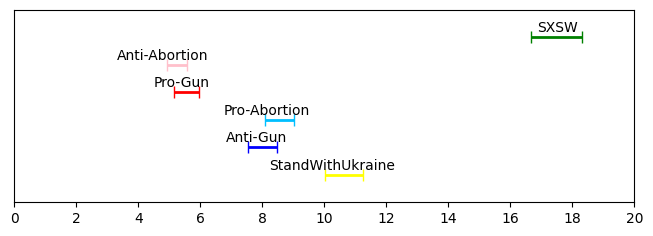

time: 1.38 s (started: 2023-11-04 18:19:04 +00:00)


In [ ]:
import matplotlib.pyplot as plt

y_dummy=list(range(1,len(CIs.index)+1))

plt.figure(figsize=(8,2.5))
plt.tick_params(left = False)
ax = plt.gca()
for i, txt in enumerate(CIs['Hashtag']):
    ax.errorbar(x=CIs['mean'][i]*100000, y = y_dummy[i], xerr=CIs['mean'][i]*100000-CIs['LL'][i]*100000,markersize='4',capsize=4, elinewidth=2, yerr=None, fmt='o',color='none',ecolor=CIs['color'][i])#,markerfacecolor=CIs['color'],markeredgecolor=CIs['color'], color=CIs['color'])
    ax.annotate(txt, (CIs['mean'][i]*100000-0.0000015*len(txt)*100000, y_dummy[i]+0.2),rotation=0)#,color=CIs['color'][i])
plt.ylim(-0.00,7)
plt.xlim(0.000000*100000,0.00020*100000)
ax.axes.yaxis.set_ticklabels([])
ax.xaxis.set_ticks(np.arange(0, 21, 2))
plt.savefig(my_dir+"Charts/HashtagUsers_variance"+".png", bbox_inches = 'tight',format="png", dpi=300)